## Prepare the packages 

In [ ]:
!pip install skompiler

     |████████████████████████████████| 45 kB 1.4 MB/s 
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54287 sha256=eba94422c087d46094a9d9a35af0f8a0599c9add246eb70ce84fc2cf261dd0d5
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built skompiler


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
from skompiler import skompile
from joblib import dump, load

# Principal Components Analysis(PCA)

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.

PCA refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is an unsupervised approach, since it involves only a set of features X1, X2, . . . , Xp, and no associated response Y .

Suppose that we wish to visualize n observations with measurements on a set of p features, X1, X2, to Xp, as part of an exploratory data analysis. We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. If p is large, then it will certainly not be possible to look at all of them; moreover, most likely none of them will be informative since they each contain just a small fraction of the total information present in the data set. In particular, we would like to find a low-dimensional representation of the data that captures as much of the information as possible. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot the observations in this low-dimensional space.






There are two important outcomes of PCA:

* It reduces number of dimensions in data.

* It shows which features explain the most variance in the data.

PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the p features.



The first principal component of a set of features X1, X2, . . . , Xp is the normalized linear combination of the features

$$Z_{1}=\phi_{11} X_{1}+\phi_{21} X_{2}+\cdots+\phi_{p 1} X_{p}$$

that has the largest variance.



Since we are only interested in variance, we assume that each of the variables in X has been centered to have mean zero (that is, the column means of X are zero). We then look for the linear combination of the sample feature values of the form

$$Z_{i1}=\phi_{11} X_{i1}+\phi_{21} X_{i2}+\cdots+\phi_{p 1} X_{ip}$$



Steps of PCA

1. After Getting original data, calculate covariance matrix.

2. Calculate EigenVectors.

3. Sort EigenVectors by Eigenvalues.

4. Choose N largest EigenValues.

5. Project Original data onto EigenVectors.

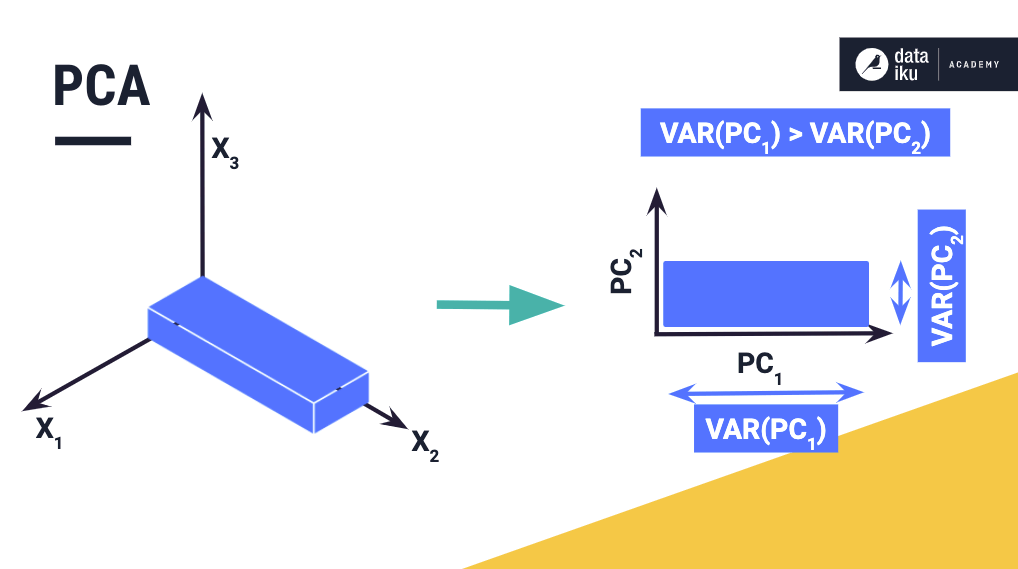

## Preprocess the raw data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ML4Biology/ML4BreastCancerWisconsin/main/data/data.csv")
df.head()


In [ ]:
df.drop("Unnamed: 32",axis=1,inplace=True)
df.drop("diagnosis",axis=1,inplace=True)

In [ ]:
df.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

## Manual Implementation of PCA


We first need to standadize the data



In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [ ]:
scaled_X

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Calculate the covariance matrix


The formula for variance is given by:
$$
\sigma_{x}^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}
$$

where n is the number of samples (e.g. the number of people) and ¯ x is the mean of the random variable x (represented as a vector). The covariance σ ( x , y ) of two random variables x and y is given by: 
$$
\sigma(x, y)=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)
$$

with $n$ samples. The variance $\sigma_{x}^{2}$ of a random variable $x$ can be also expressed as the covariance with itself by $\sigma(x, y)$.

In [ ]:
# If rowvar is True (default), then each row represents a
# variable, with observations in the columns. Otherwise, the relationship
#    is transposed: each column represents a variable, while the rows
# contain observations.
cov_matrix = np.cov(scaled_X, rowvar = False)

In [ ]:
len(cov_matrix)

31

In [ ]:
len(cov_matrix[1])

31

### Get Eigen Vectors and Eigen Values


In [ ]:
##  Compute the eigenvalues and right eigenvectors of a square array.
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


In [ ]:
eigen_values

array([1.33114519e+01, 5.70683496e+00, 2.84038694e+00, 1.98484548e+00,
       1.65171815e+00, 1.23684643e+00, 9.79995551e-01, 6.72935632e-01,
       4.61603682e-01, 4.03842838e-01, 3.49769685e-01, 2.94407846e-01,
       2.61606691e-01, 2.41755091e-01, 1.57250011e-01, 9.42942450e-02,
       7.99504590e-02, 5.91502270e-02, 5.26837847e-02, 4.92084099e-02,
       3.11254863e-02, 2.99939190e-02, 2.74788170e-02, 2.42917142e-02,
       1.80711203e-02, 1.55069827e-02, 8.18608563e-03, 6.91024741e-03,
       1.33274432e-04, 7.49693618e-04, 1.59213568e-03])

In [ ]:
len(eigen_vectors)

31

In [ ]:
len(eigen_vectors[1])


31

In [ ]:
# Now we will sort EigenVectors by Eigenvalues.
sorted_key = np.argsort(eigen_values)[::-1][:2]


array([0, 1])

In [ ]:
sorted_key

array([0, 1])

In [ ]:
eigen_values[sorted_key]

array([13.31145188,  5.70683496])

In [ ]:
eigen_values_srt, eigen_vectors_srt = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [ ]:
principal_components=np.dot(scaled_X,eigen_vectors_srt)


In [ ]:
principal_components

array([[ -9.18319983,   1.97127137],
       [ -2.38329766,  -3.75345877],
       [ -5.74247239,  -1.08035048],
       ...,
       [ -1.2518901 ,  -1.89397674],
       [-10.36503528,   1.69639755],
       [  5.47826365,  -0.67278804]])

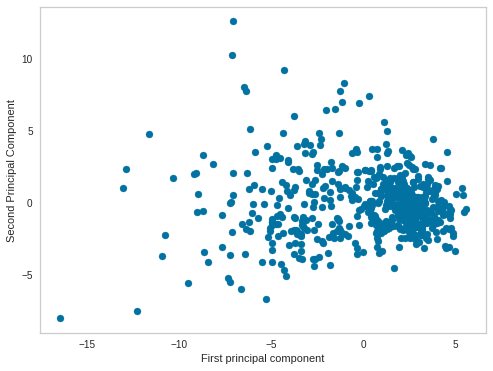

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid(False)
plt.show()

## Model

For a real world example, we will use Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [ ]:
pc = PCA(n_components=2)
fitted_pc = pc.fit_transform(scaled_X)


In [ ]:
component_df = pd.DataFrame(data=fitted_pc,columns=["First Component","Second Component"])

In [ ]:
component_df.head(10)


,First Component,Second Component
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
5,2.371151,3.964910
6,2.233527,-2.674076
7,2.151433,2.327691
8,3.165727,3.408826
9,6.354960,7.723539


In [ ]:
pc.explained_variance_ratio_

array([0.42864701, 0.18376792])

## Find optimal component number

In [ ]:
pc_all = PCA().fit(scaled_X)



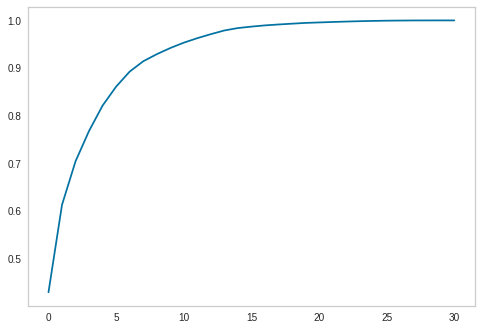

In [ ]:
plt.plot(np.cumsum(pc_all.explained_variance_ratio_))
plt.grid(False)
plt.show()

# Reference

Link to this notebook itself: https://colab.research.google.com/drive/1KTA82TRZC9UNuncBqXELib80KJqn3QwD?usp=sharing


https://www.kaggle.com/berkayalan/principal-component-analysis-pca-complete-guide


https://datascienceplus.com/understanding-the-covariance-matrix/

https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Unsupervised%20Learning%20-%20Clustering%20-%20Principal%20Components%20Analysis(PCA)/Unsupervised%20Learning%20-%20Clustering.ipynb
